### Importing Libs

In [134]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

### Loading data to sqlite

In [89]:
df_nodes = pd.read_csv('nodes.csv')
df_edges = pd.read_csv('edges.csv')

In [93]:
engine = create_engine('sqlite:///graph.db')
Session = sessionmaker(bind=engine)
session = Session()

Base = declarative_base()

class GraphNode(Base):
    __tablename__ = 'graph_nodes'
    id = Column(Integer, primary_key=True)
    state = Column(String)
    population = Column(Integer)
    lat = Column(Integer)
    lon = Column(Integer)
    
class GraphEdge(Base):
    __tablename__ = 'graph_edges'
    id = Column(Integer, primary_key=True)
    from_state = Column(String)
    to_state = Column(String)
    weight = Column(Float)

Base.metadata.drop_all(engine)
Base.metadata.create_all(engine)

In [94]:
for i, n in df_nodes.iterrows():
    new_node = GraphNode(state=n['state'], population=n['population'], lat=n['lat'], lon=n['lon'])
    session.add(new_node)
    session.commit()

for i, n in df_edges.iterrows():
    new_edge = GraphEdge(from_state=n['from_state'], to_state=n['to_state'], weight=n['weight'])
    session.add(new_edge)
    session.commit()
    

In [95]:
graph_nodes = session.query(GraphNode).all()
graph_edges = session.query(GraphEdge).all()

### Creating a new Graph

In [56]:
G = nx.Graph()
# G = nx.DiGraph()
# nx.MultiGraph()
# nx.MultiDiGraph()

In [62]:
for graph_node in graph_nodes:
    G.add_node(
        graph_node.state, 
        population=graph_node.population, 
        location=(graph_node.lat, graph_node.lon)
    )

In [63]:
G.nodes(data=True)

NodeDataView({'El Paso, TX': {'population': 674433, 'location': (-106, 31)}, 'Long Beach, CA': {'population': 469428, 'location': (-118, 33)}, 'Dallas, TX': {'population': 1257676, 'location': (-96, 32)}, 'Oakland, CA': {'population': 406253, 'location': (-122, 37)}, 'Albuquerque, NM': {'population': 556495, 'location': (-106, 35)}, 'Baltimore, MD': {'population': 622104, 'location': (-76, 39)}, 'Raleigh, NC': {'population': 431746, 'location': (-78, 35)}, 'Mesa, AZ': {'population': 457587, 'location': (-111, 33)}, 'Arlington, TX': {'population': 379577, 'location': (-97, 32)}, 'Sacramento, CA': {'population': 479686, 'location': (-121, 38)}, 'Wichita, KS': {'population': 386552, 'location': (-97, 37)}, 'Tucson, AZ': {'population': 526116, 'location': (-110, 32)}, 'Cleveland, OH': {'population': 390113, 'location': (-81, 41)}, 'Louisville/Jefferson County, KY': {'population': 609893, 'location': (-85, 38)}, 'San Jose, CA': {'population': 998537, 'location': (-121, 37)}, 'Oklahoma City,

In [64]:
G.number_of_nodes()

51

In [67]:
for graph_edge in graph_edges:
    G.add_edge(graph_edge.from_state, graph_edge.to_state, weight=graph_edge.weight)

In [73]:
G.edges(data=True)

EdgeDataView([('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}), ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}), ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}), ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}), ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046}), ('Long Beach, CA', 'Oakland, CA', {'weight': 579.5829987228403}), ('Long Beach, CA', 'Mesa, AZ', {'weight': 590.156204210031}), ('Long Beach, CA', 'Sacramento, CA', {'weight': 611.0649790490104}), ('Long Beach, CA', 'Tucson, AZ', {'weight': 698.6566667728368}), ('Long Beach, CA', 'San Jose, CA', {'weight': 518.2330606219175}), ('Long Beach, CA', 'Fresno, CA', {'weight': 360.4704577972272}), ('Long Beach, CA', 'San Diego, CA', {'weight': 151.45008247402757}), ('Long Beach, CA', 'Phoenix, AZ', {'weight': 567.4125390872786}), ('Long Beach, CA', 'San Francisco, CA', {'weight': 585.6985397766858}), ('Long Beach, CA', 'Los Angeles, CA', {'weight': 31.69419563

In [70]:
G.number_of_edges()

235

In [80]:
print(graph_nodes[0].state, graph_nodes[1].state)

El Paso, TX Long Beach, CA


In [81]:
[*nx.common_neighbors(G, graph_nodes[0].state, graph_nodes[1].state)]

['Mesa, AZ', 'Tucson, AZ', 'Phoenix, AZ']

### Creating another Graph with Bulk Load

In [105]:
G = nx.Graph()
G.add_nodes_from([(n.state, dict(population=n.population, location=(n.lat, n.lon))) for n in graph_nodes])
G.add_edges_from([(n.from_state, n.to_state, dict(weight=n.weight)) for n in graph_edges])

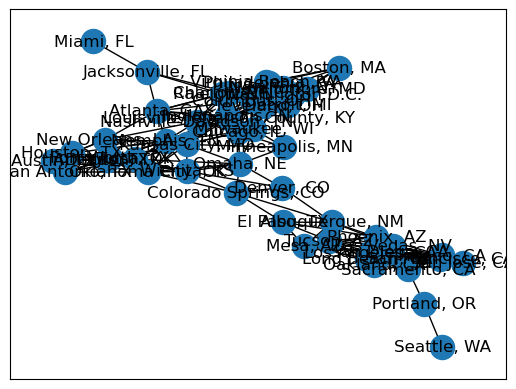

In [107]:
nx.draw_networkx(G)

In [108]:
G.number_of_edges(), G.number_of_nodes()

(235, 51)

### Examples

In [110]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

In [114]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

In [111]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])
G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

In [117]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Examples

In [119]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [120]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [121]:
chess.edges(data=True)

OutMultiEdgeDataView([('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}), ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}), ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}), ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}), ('1', '1214', {'outcome': 0, 'tim

In [122]:
games_played = chess.degree()
games_played

DiMultiDegreeView({'1': 48, '2': 112, '3': 85, '4': 12, '5': 18, '6': 95, '7': 9, '8': 20, '9': 142, '10': 4, '11': 2, '12': 70, '13': 148, '14': 153, '15': 23, '16': 3, '17': 115, '18': 45, '19': 27, '20': 12, '21': 65, '22': 6, '23': 41, '24': 72, '25': 72, '26': 2, '27': 3, '28': 41, '29': 8, '30': 115, '31': 23, '32': 146, '33': 67, '34': 52, '35': 22, '36': 118, '37': 30, '38': 39, '39': 79, '40': 26, '41': 71, '42': 200, '43': 10, '44': 77, '45': 74, '46': 41, '47': 92, '48': 45, '49': 58, '50': 9, '51': 90, '52': 4, '53': 167, '54': 80, '55': 35, '56': 87, '57': 48, '58': 29, '59': 111, '60': 43, '61': 107, '62': 74, '63': 7, '64': 171, '65': 43, '66': 203, '67': 39, '68': 23, '69': 4, '70': 15, '71': 55, '72': 10, '73': 19, '74': 144, '75': 22, '76': 20, '77': 71, '78': 18, '79': 122, '80': 4, '81': 29, '82': 29, '83': 58, '84': 32, '85': 35, '86': 13, '87': 52, '88': 61, '89': 123, '90': 58, '91': 100, '92': 257, '93': 24, '94': 10, '95': 14, '96': 41, '97': 25, '98': 276, '99

In [126]:
max_value = max(dict(games_played).values())
max_key, = [i for i in dict(games_played).keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

player 461
280 games


In [127]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

white black                                        outcome
0     1     2  {'outcome': 0, 'timestamp': 885635999.999997}
1     1     3  {'outcome': 0, 'timestamp': 885635999.999997}
2     1     4  {'outcome': 0, 'timestamp': 885635999.999997}
3     1     5  {'outcome': 1, 'timestamp': 885635999.999997}
4     1     6  {'outcome': 0, 'timestamp': 885635999.999997}

In [128]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

white black  outcome
0     1     2        0
1     1     3        0
2     1     4        0
3     1     5        1
4     1     6        0

In [129]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

/tmp/ipykernel_1611/2985673904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  won_as_white = df[df['outcome']==1].groupby('white').sum()
/tmp/ipykernel_1611/2985673904.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  won_as_black = -df[df['outcome']==-1].groupby('black').sum()


outcome
1         7.0
100       7.0
1000      1.0
1002      1.0
1003      5.0

In [130]:
win_count.nlargest(5, 'outcome')

outcome
330    109.0
467    103.0
98      94.0
456     88.0
461     88.0

### Visualising Network

In [132]:
G = nx.Graph()
G.add_nodes_from([(n.state, dict(population=n.population, location=(n.lat, n.lon))) for n in graph_nodes])
G.add_edges_from([(n.from_state, n.to_state, dict(weight=n.weight)) for n in graph_edges])

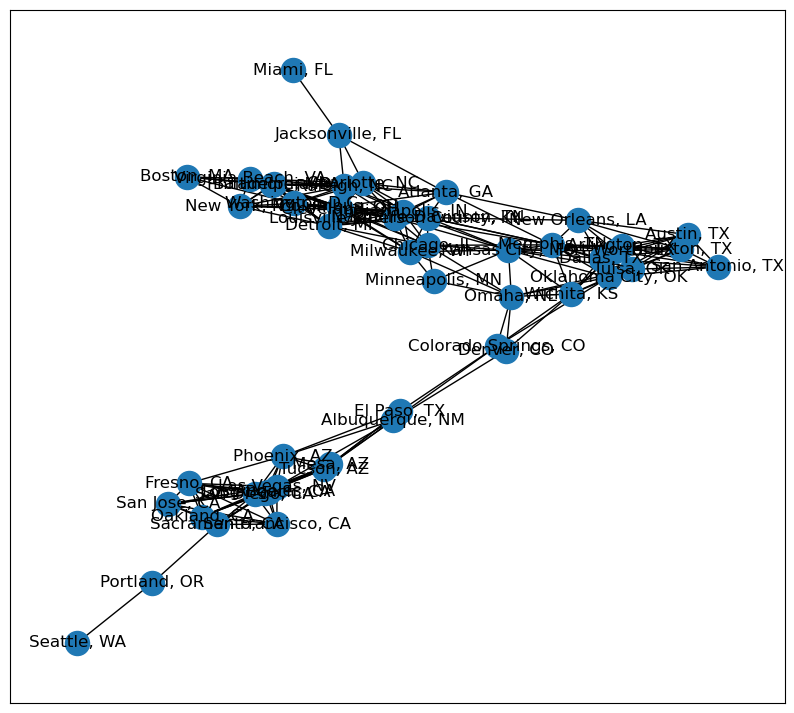

In [135]:
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [136]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'arf_layout']

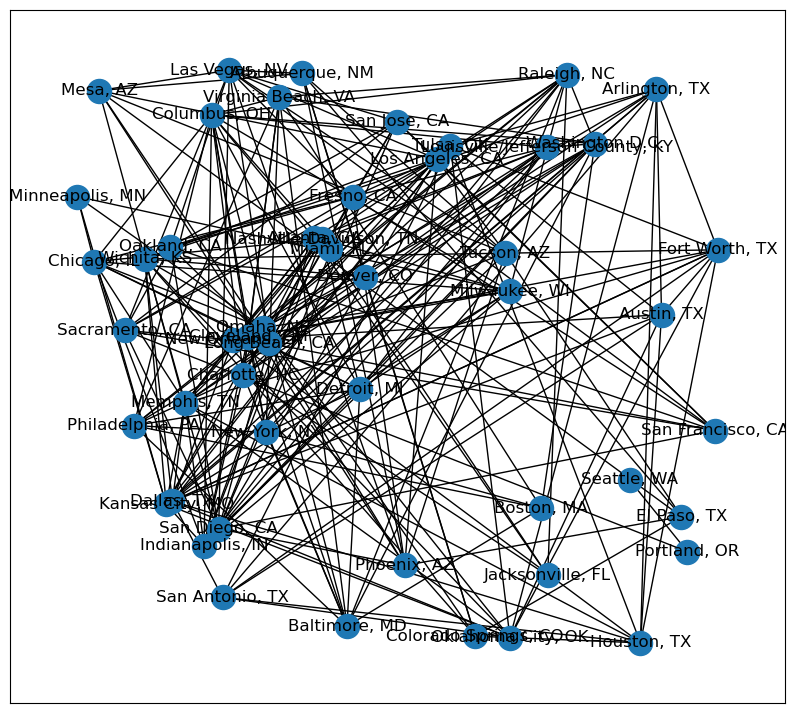

In [137]:
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

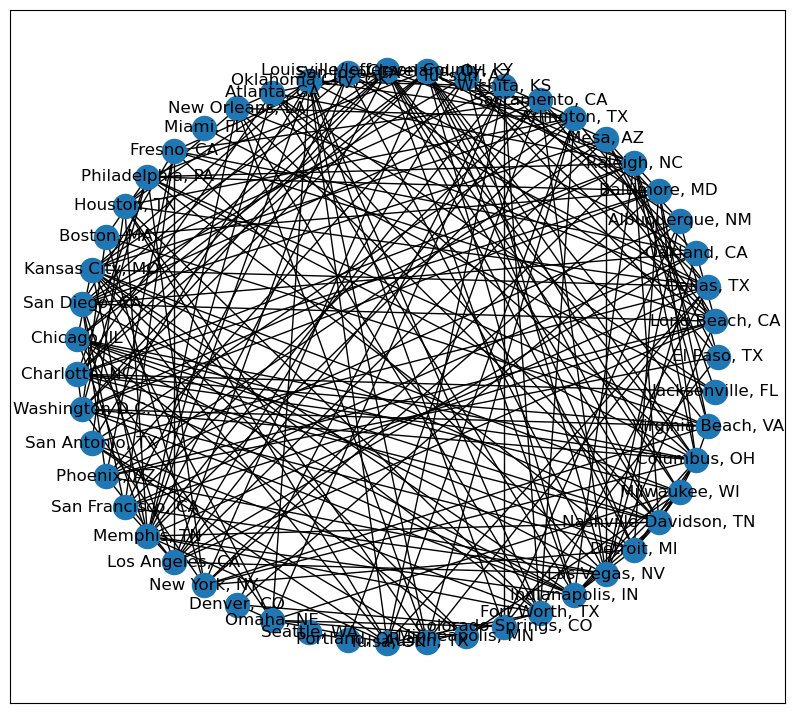

In [138]:
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

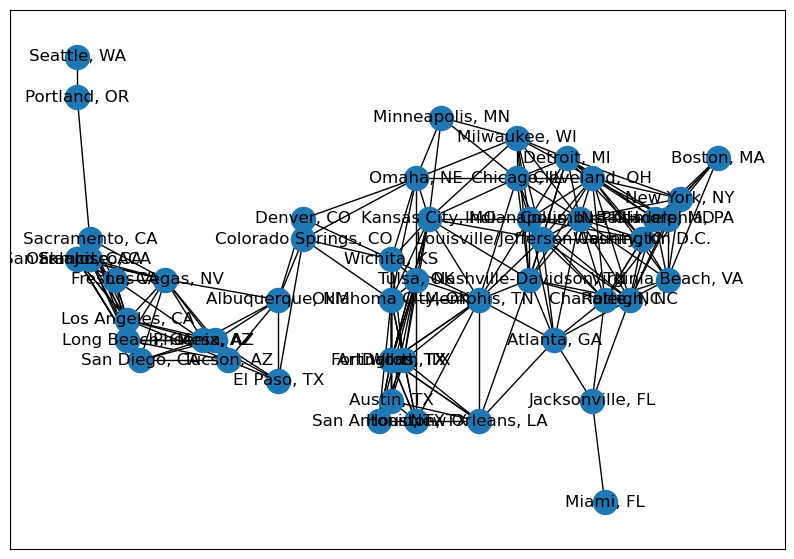

In [139]:
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

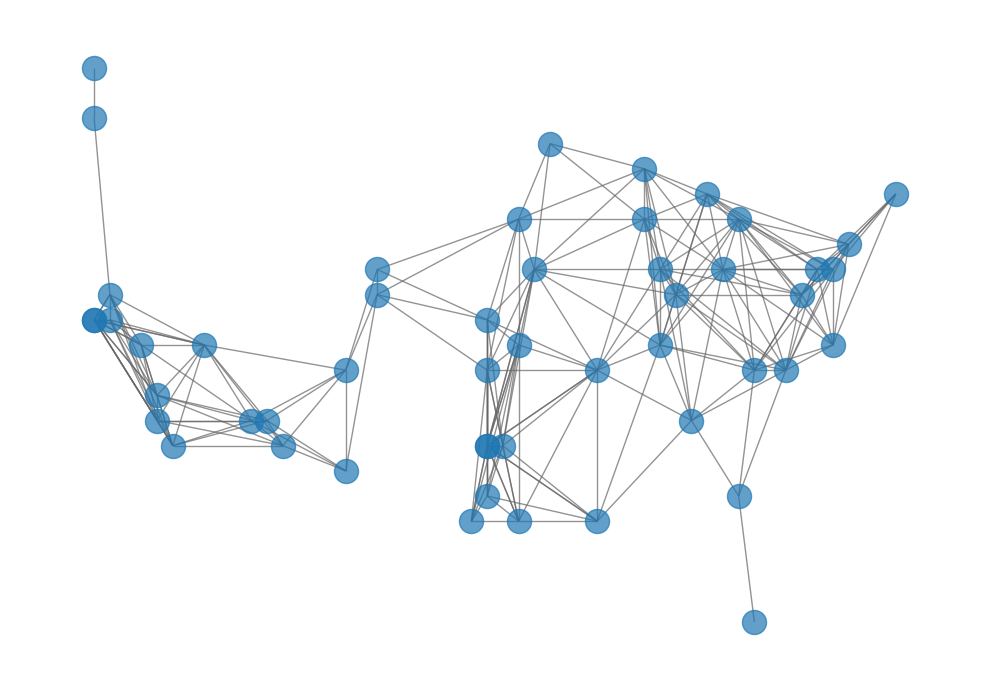

In [140]:
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

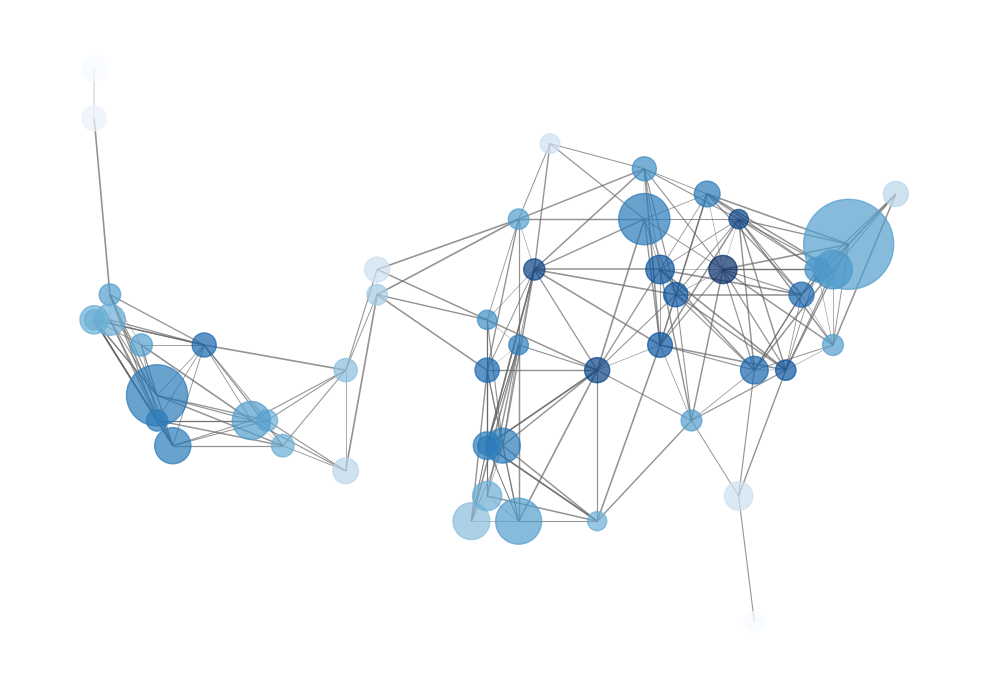

In [141]:
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

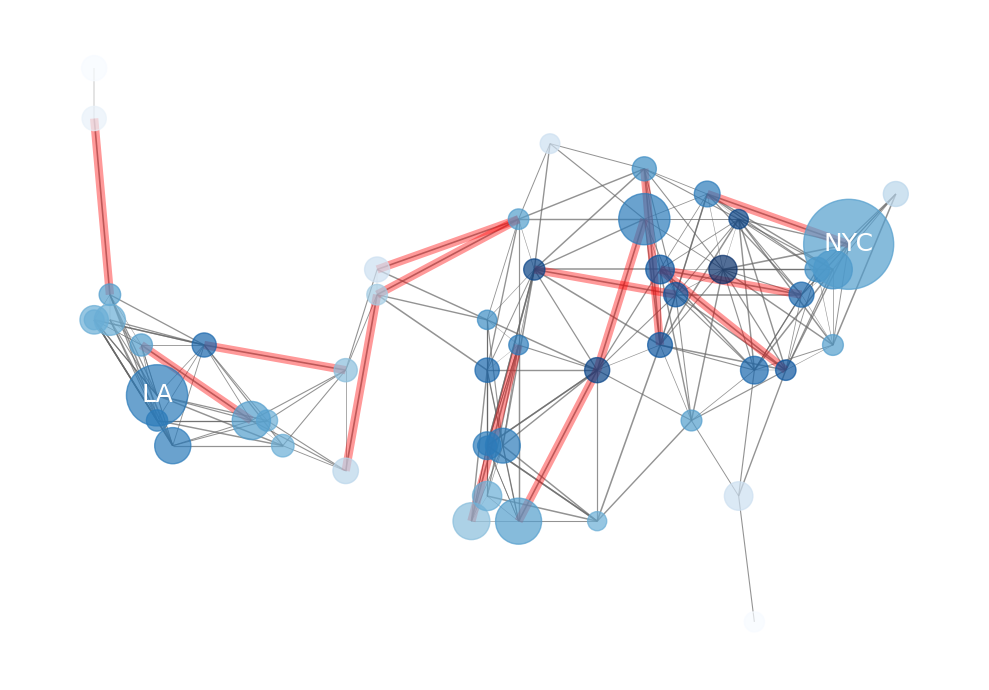

In [142]:
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();